## Análise de dados: Abertura de cafeteria

- Data: 13/10/2025
- Caroline Beatriz Scheurich
- Objetivo: Recomendações sobre o tipo mais apropriado de restaurante e o número de assentos.

## Etapa 1 - Inicialização e Carregamento dos dados

- Carregando as bibliotecas
- Carregando o banco de dados
- Lendo as informações dos arquivos

In [1]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o banco de dados:
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
# Vizualizando o banco de dados:
display(rest_data)
print(rest_data.info())

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None


Temos 3 dados ausentes na coluna 'chain', vamos removê-los:

In [4]:
# Removendo linhas de dados ausentes:
rest_data = rest_data.dropna()

In [5]:
# Conferindo duplicados:
rest_data.duplicated().sum()

0

## Etapa 2 - Análise de Dados

In [6]:
display(rest_data.head())

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [7]:
# Análise das proporções de vários tipos de estabelecimentos:
types = rest_data['object_type'].value_counts(normalize=True) * 100
types

Restaurant    75.176202
Fast Food     11.048922
Cafe           4.508706
Pizza          3.306385
Bar            3.026534
Bakery         2.933250
Name: object_type, dtype: float64

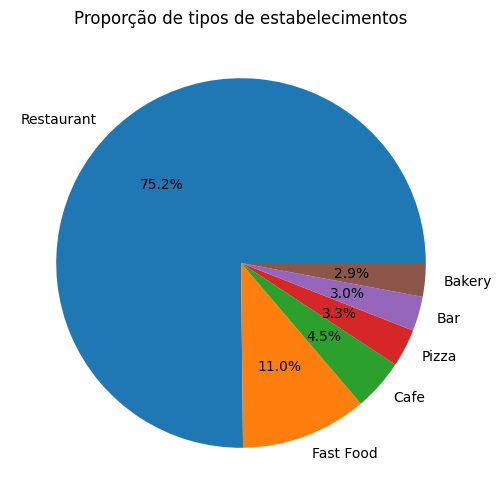

In [8]:
# Gráfico das proporções dos tipos de estabelecimentos:
plt.figure(figsize=(6,6))
types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporção de tipos de estabelecimentos')
plt.ylabel('')
plt.show()

No gráfico acima conseguimos analisar as proporções de tipos de estabelecimentos, percebemos que os restaurantes dominam este mercado e possuem grande representatividade de 75,2%. Seguido de Fast food com 11%, as cafeterias representam apenas 4,5% do total.

In [9]:
# Proporção de estabelecimentos de rede ou não:
chain = rest_data['chain'].value_counts(normalize=True) * 100
chain

False    61.898839
True     38.101161
Name: chain, dtype: float64

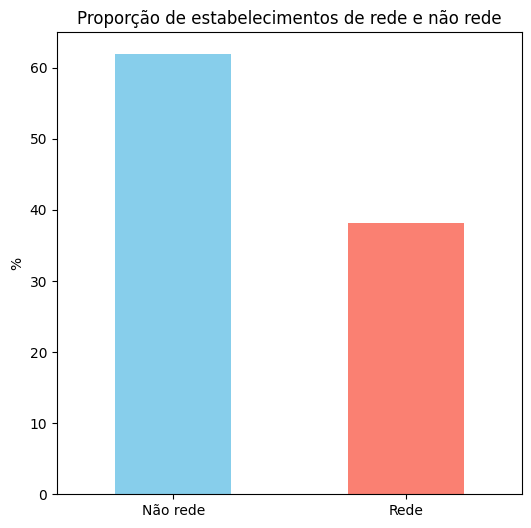

In [10]:
# Gráfico das proporções de rede ou não rede:
plt.figure(figsize=(6,6))
chain.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporção de estabelecimentos de rede e não rede')
plt.xticks([0,1], ['Não rede', 'Rede'], rotation=0)
plt.ylabel('%')
plt.show()

A maioria dos estabelecimentos não pertencem a rede: 60%. Isso mostra que o mercado é aberto para empreendimentos independentes.

In [11]:
# Que tipo de estabelecimento é típico para redes:
typical_chain = rest_data[rest_data['chain'] == True]['object_type'].value_counts()
print('Tipo de estabelecimento mais comum entre redes:')
print(typical_chain)

Tipo de estabelecimento mais comum entre redes:
Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: object_type, dtype: int64


In [12]:
# Média de assentos rede x não rede:
chain_seats = rest_data.groupby('chain')['number'].agg(['mean', 'count'])
print(chain_seats)

            mean  count
chain                  
False  46.171467   5972
True   39.694233   3676


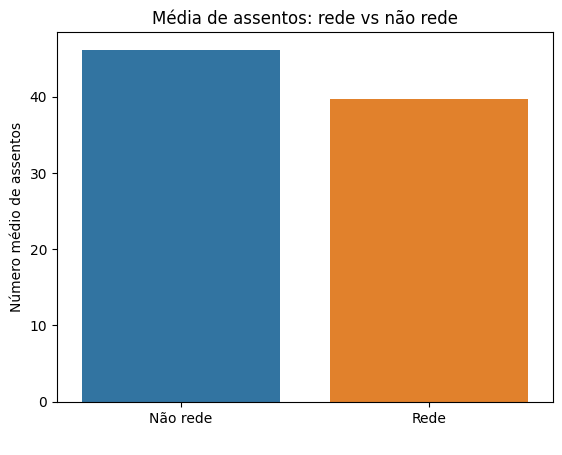

In [13]:
sns.barplot(data=rest_data, x='chain', y='number', ci=None)
plt.title('Média de assentos: rede vs não rede')
plt.xticks([0,1], ['Não rede', 'Rede'])
plt.xlabel(' ')
plt.ylabel('Número médio de assentos')
plt.show()

As redes tendem a ter menos assentos, que sugerem lugares menores, com maior rotatividade. Já estabelecimentos não pertencentes a redes tendem a ser maiores, com mais assentos.

object_type
Restaurant    48.048807
Bar           44.767123
Fast Food     31.837711
Pizza         28.545455
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64


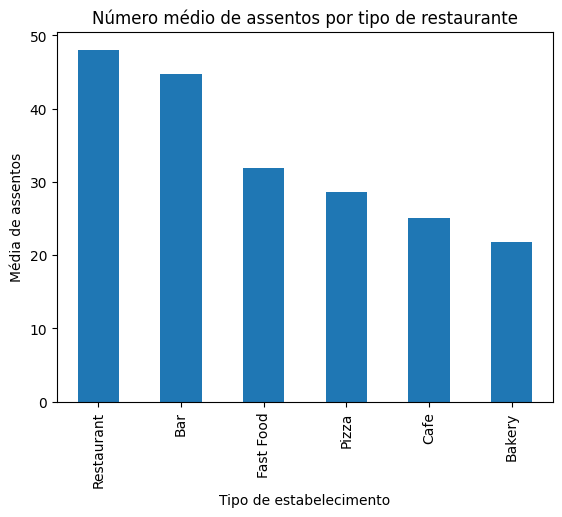

In [14]:
# Número médio de assentos para cada tipo de restaurante:
seat_avg = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)
print(seat_avg)

seat_avg.plot(kind='bar')
plt.title('Número médio de assentos por tipo de restaurante')
plt.xlabel('Tipo de estabelecimento')
plt.ylabel('Média de assentos')
plt.show()

As cafeterias têm capacidade média de 25 lugares, remetendo a espaços mais intimistas e com rotatividade rápida.

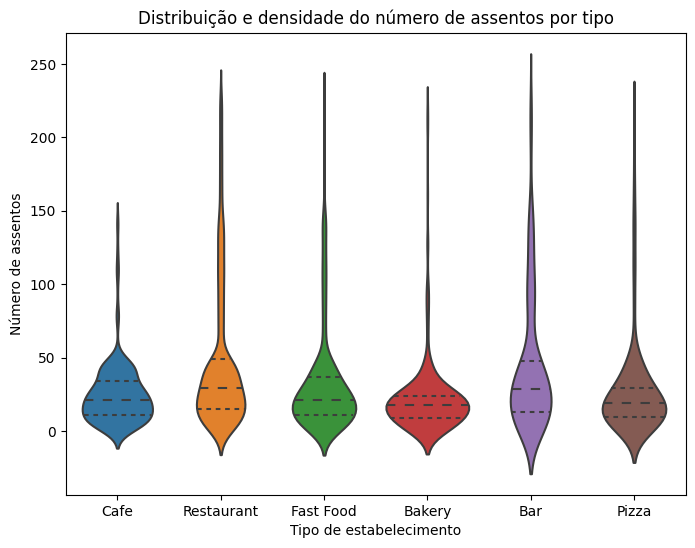

In [15]:
# Gráfico de densidade:
plt.figure(figsize=(8,6))
sns.violinplot(data=rest_data, x='object_type', y='number', inner='quartile')
plt.title('Distribuição e densidade do número de assentos por tipo')
plt.xlabel('Tipo de estabelecimento')
plt.ylabel('Número de assentos')
plt.show()

Todos os estabelecimentos possuem maior concentração entre 10 e 40 assentos. As caudas longos para cima nos indicam alguns valores extremos (outliers) que são alguns locais com muitos assentos, acima de 100 ou 250 lugares.

Cafés possuem uma distribuição mais concentrada em menos assentos, entre 10 e 30.

In [16]:
# Dados dos nomes das ruas da coluna address em uma coluna separada:
rest_data['street'] = rest_data['address'].str.extract(r'\d+\s+(.+)')
display(rest_data.head())

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
MELROSE AVE          128
Name: street, dtype: int64


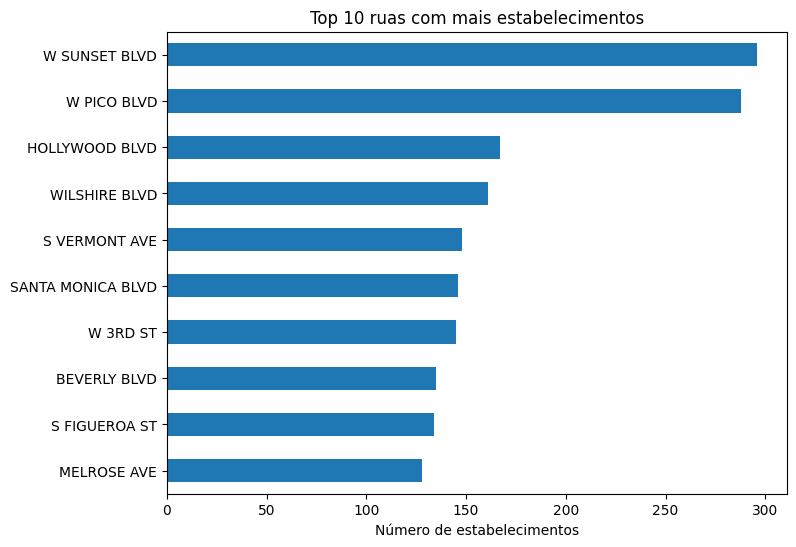

In [17]:
# Gráfico de dez ruas com o maior número de restaurantes
top_streets = rest_data['street'].value_counts().head(10)
print(top_streets)
top_streets.plot(kind='barh', figsize=(8,6))
plt.title('Top 10 ruas com mais estabelecimentos')
plt.xlabel('Número de estabelecimentos')
plt.gca().invert_yaxis()
plt.show()

Temos o top 3:
- W Sunset Blvd (296 restaurantes)
- W Pico Blvd (288 restaurantes)
- Hollywood Blvd (167 restaurantes

As ruas mais populares concentram maior quantidade de estabelecimentos, o que indica grande concorrência, mas também forte demanda. Para entrar nessas regiões é impressindivel a diferenciação com experiência para o usuário. Como se destacar entre tantos? Garçons robôs parecem encaixar muito bem neste cenário.

In [18]:
# Número de ruas que têm apenas um restaurante
one_restaurant_streets = (rest_data['street'].value_counts() == 1).sum()
print(f"Número de ruas com apenas um estabelecimento: {one_restaurant_streets}")

Número de ruas com apenas um estabelecimento: 2442


Muitas ruas com poucos estabelecimentos que podem ser uma oportunidade a ser explorada. Menor competição direta.

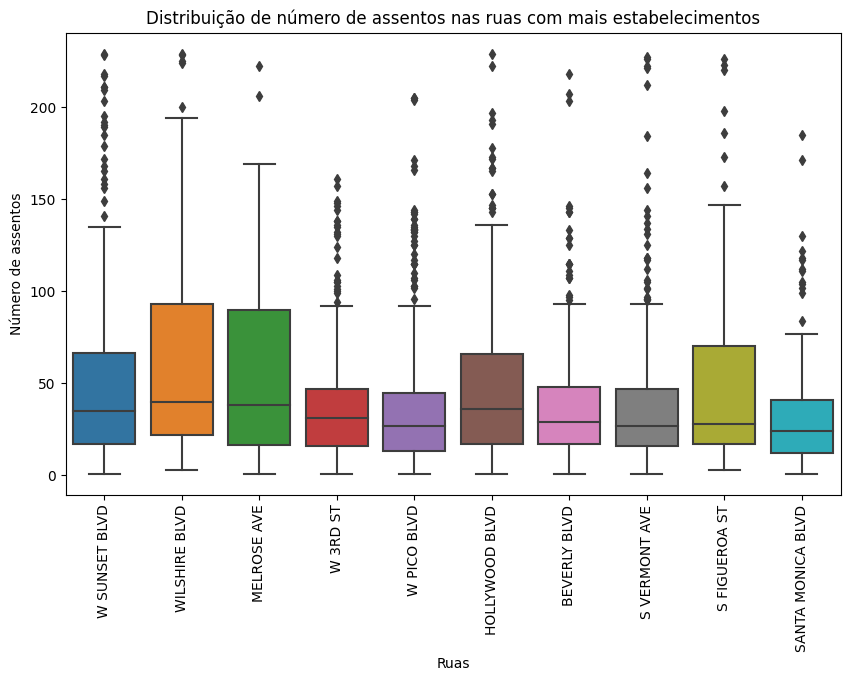

In [19]:
# Distribuição de número de assentos para as ruas com muitos restaurantes:
many_restaurants_streets = rest_data['street'].value_counts().head(10).index
subset = rest_data[rest_data['street'].isin(many_restaurants_streets)]

plt.figure(figsize=(10,6))
sns.boxplot(data=subset, x='street', y='number')
plt.title('Distribuição de número de assentos nas ruas com mais estabelecimentos')
plt.xlabel('Ruas')
plt.ylabel('Número de assentos')
plt.xticks(rotation=90)
plt.show()

A maioria das ruas tem distribuição com cauda longa para cima (mais outliers de estabelecimentos grandes).

As ruas S FIGUEROA ST, WILSHIRE BLVD e HOLLYWOOD BLVD parecem ser pontos com maior concentração de estabelecimentos grandes.

As ruas W 3RD ST, S WESTERN AVE, e SANTA MONICA BLVD têm estabelecimentos geralmente menores.

Mesmo nas ruas com mediana baixa, existem outliers com capacidade acima de 150 assentos, o que indica grande diversidade no tipo de estabelecimento.

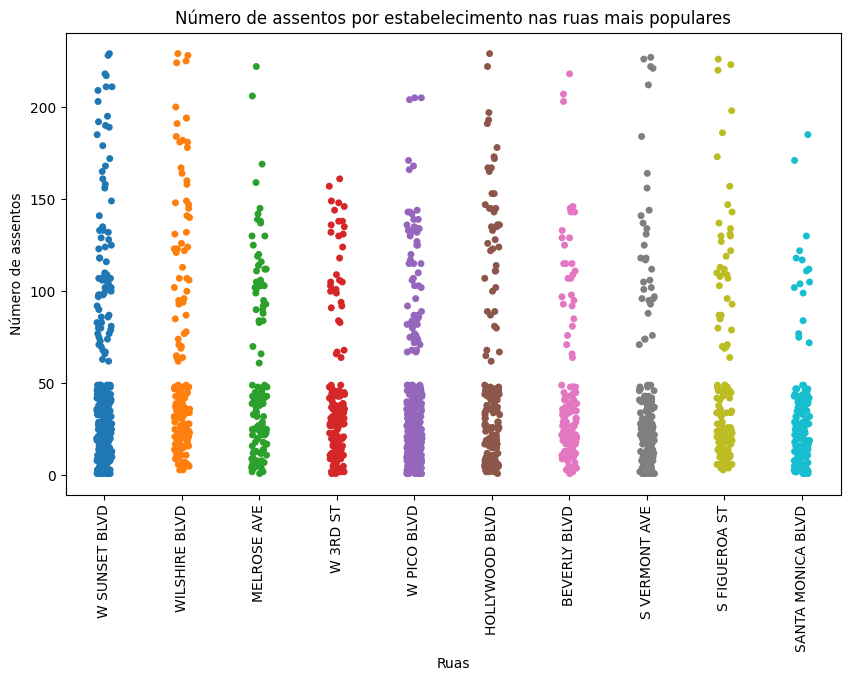

In [20]:
# Gráfico stripplot:
plt.figure(figsize=(10,6))
sns.stripplot(data=subset, x='street', y='number', jitter=True)
plt.title('Número de assentos por estabelecimento nas ruas mais populares')
plt.xlabel('Ruas')
plt.ylabel('Número de assentos')
plt.xticks(rotation=90)
plt.show()

Outra forma de visualizar os dados, mostrando a grande concentração de estabelecimentos com até 50 assentos. E também fácil visualização dos outliers.

## Etapa 3 - Conclusão

A análise de mercado mostrou que o setor gastronômico em Los Angeles é amplamente dominado por restaurantes convencionais (75%), seguidos de fast foods (11%). As cafeterias representam apenas cerca de 4,5% do total, o que revela um nicho ainda pouco explorado, com espaço para inovação e diferenciação, exatamente o tipo de oportunidade ideal para um conceito inovador como o de uma cafeteria com garçons robôs.

A média de assentos por cafeteria é de aproximadamente 25 lugares, o que indica que o modelo de pequeno porte é o mais comum e eficiente nesse segmento. Esse tamanho permite controle de custos, atendimento ágil e ambiente acolhedor, compatível com a proposta de uma cafeteria tecnológica, moderna e compacta.


A análise espacial também revelou que, embora existam ruas com alta concentração de restaurantes (como W Sunset Blvd e Hollywood Blvd), há mais de 2.400 ruas com apenas um restaurante, o que representa ótimas oportunidades em áreas com pouca concorrência. Para o projeto, isso significa a possibilidade de escolher entre duas estratégias:

- abrir em zonas de alto fluxo, aproveitando a curiosidade e o apelo da novidade tecnológica, ou

- posicionar-se em regiões menos saturadas, menor competição direta.


Quanto à sustentabilidade do sucesso no longo prazo, o conceito tecnológico pode ser o gancho inicial para atrair clientes, mas a qualidade do produto, conforto do ambiente e atendimento eficiente (mesmo automatizado) serão essenciais para garantir recorrência e fidelização.

Além disso, o fato de o mercado de Los Angeles ainda ter pouca presença de redes de cafeterias, somado à alta quantidade de negócios independentes bem-sucedidos, demonstra potencial de expansão futura. Caso o modelo de cafeteria com garçons robôs conquiste boa aceitação, existe espaço para crescimento escalável, com possibilidade de desenvolver uma rede ou franquia especializada em cafeterias automatizadas.

## Etapa 4 - Apresentação

Presentation: <https://drive.google.com/file/d/1aaU5phnRKGocLyB_LbsMM-s6GZ2h0YYk/view?usp=sharing>